In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
myWeb = nx.DiGraph()
myPages = range(1,6)

In [9]:
connections = [(1,2), (3,1), (2,5), (3,2), (3,4), (4,1), (4,5), (5,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

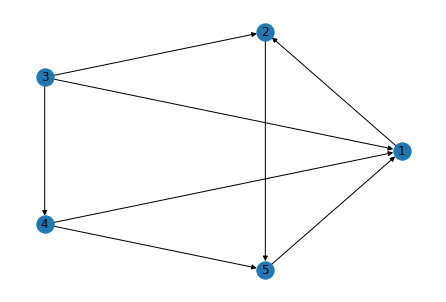

In [10]:
pos= nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [11]:
def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(
        [1.0/count
        if count>0 else 0.0 for count in outwards])
    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set)/float(nodes_set)
    if np.min(np.sum(G, axis=0)) < 1.0:
        print ('WARN: G is substochastic')
    return G,p

In [12]:
G,p = createPageRank(myWeb)
print(G)

[[0.         0.         0.33333333 0.5        1.        ]
 [1.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         1.         0.         0.5        0.        ]]
